In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')

In [22]:
# Load data
df = pd.read_excel('dataset/P1_MCS_Workspace.xlsx', sheet_name='C1-18-24(YA)')

In [23]:
# Clean data
# Drop unnamed columns
print(df.columns.tolist())
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Z-Score AI', 'AI Outlier(Y/N)', 'Z-Score SS', 'SS Outlier(Y/N)', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']


In [24]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           6  Female   22                  17                      76   

   Z-Score AI AI Outlier(Y/N)  Z-Score SS SS Outlier(Y/N)  
0   -0.279426               N   -0.710041               N  
1    1.795103               N    1.018039               N  
2   -1.909414               N   -2.067818               N  
3    1.597529               N    0.853460               N  
4    1.548135               N    0.812315               N  


In [25]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Z-Score AI                0
AI Outlier(Y/N)           0
Z-Score SS                0
SS Outlier(Y/N)           0
dtype: int64


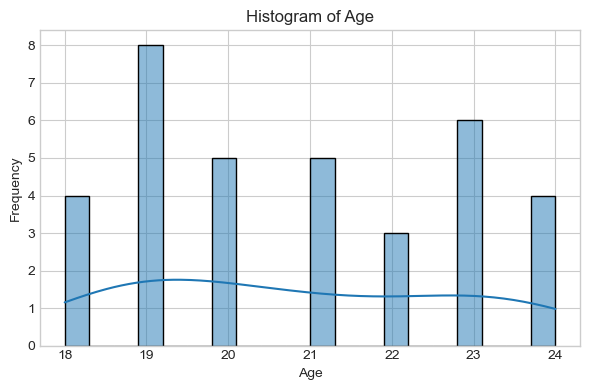

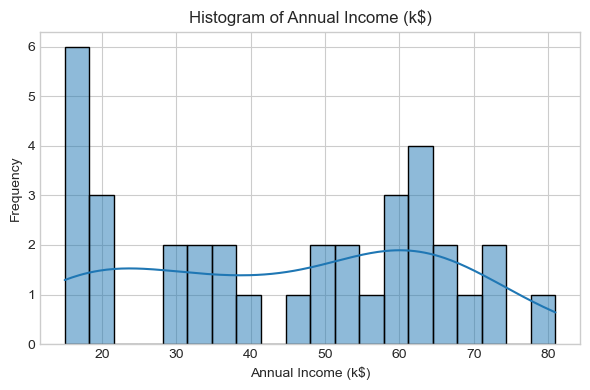

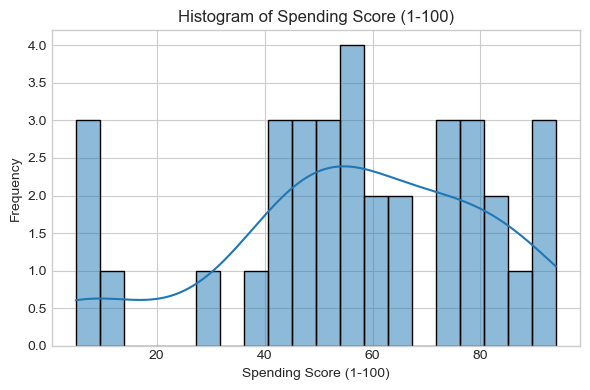

In [26]:
# Explore
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# Histograms
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

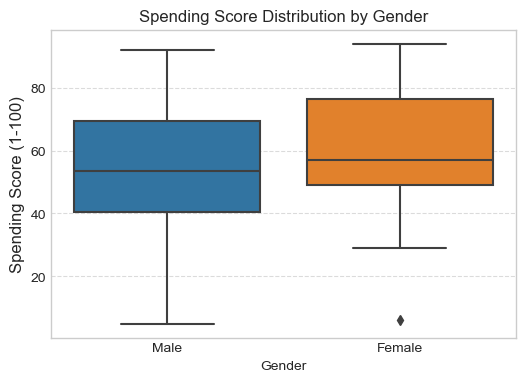

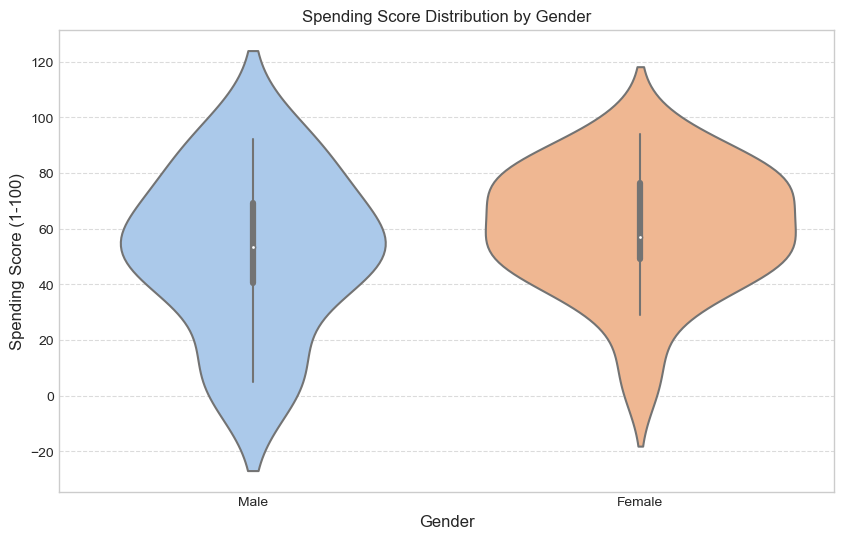

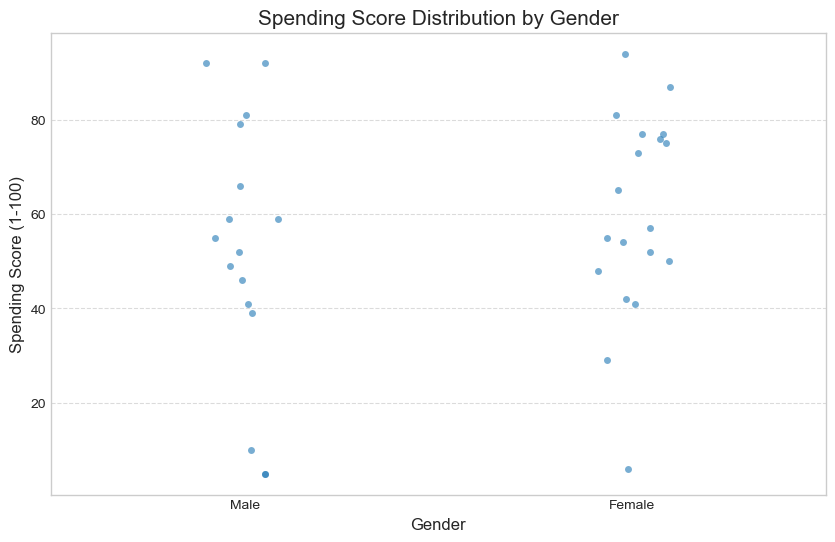

In [27]:
# Check correlations between gender and spending score/ annual income
# See what the data tells for this category
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_spending_bp.png')
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=df, palette='pastel')
plt.title('Spending Score Distribution by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_spending_vp.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='Gender', y='Spending Score (1-100)', data=df, jitter=True, alpha=0.6)
plt.title('Spending Score Distribution by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_spending_sp.png') 
plt.show()

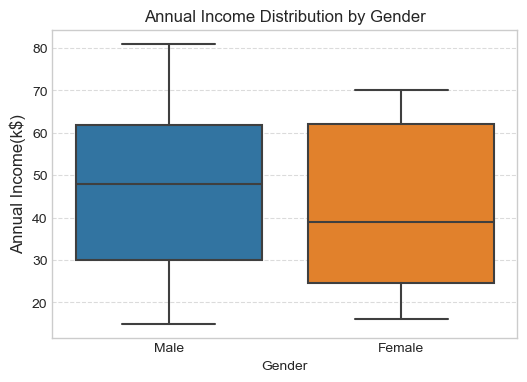

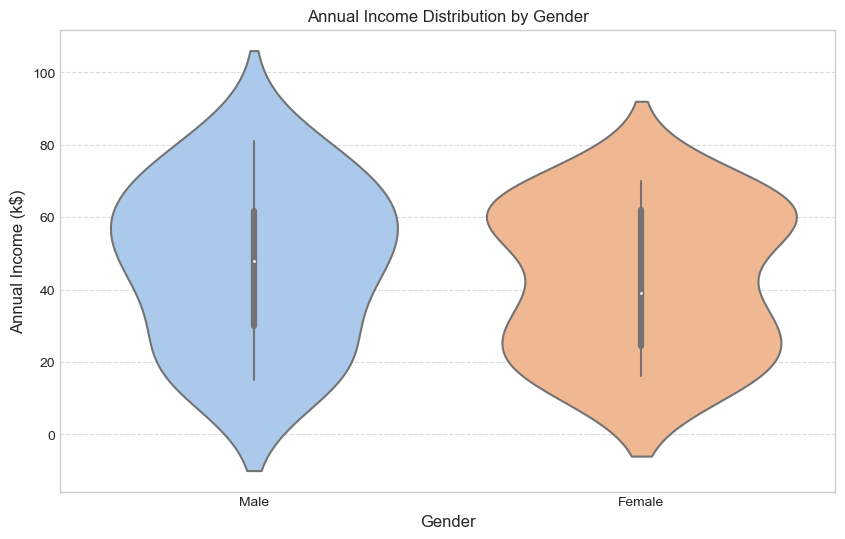

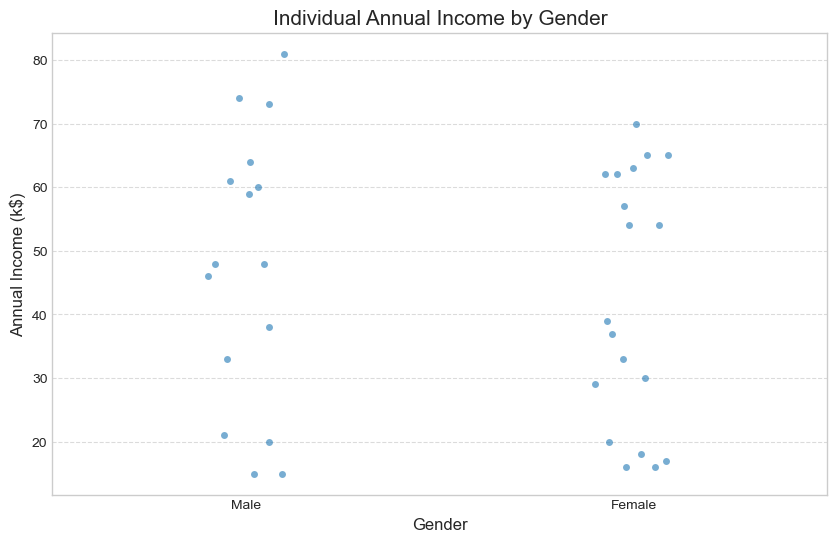

In [28]:
# Checking correlation between Gender and Annual Income
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income(k$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_income_bp.png')  
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(x='Gender', y='Annual Income (k$)', data=df, palette='pastel')
plt.title('Annual Income Distribution by Gender')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_income_vp.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.stripplot(x='Gender', y='Annual Income (k$)', data=df, jitter=True, alpha=0.6)
plt.title('Individual Annual Income by Gender', fontsize=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gender_income_sp.png') 
plt.show()




In [29]:
# Calculate summary statistics by Gender 
gender_stats = df.groupby('Gender')['Spending Score (1-100)'].describe()
print("Spending Score Statistics by Gender")
print(gender_stats)

Spending Score Statistics by Gender
        count       mean        std  min   25%   50%    75%   max
Gender                                                           
Female   19.0  59.947368  21.754881  6.0  49.0  57.0  76.50  94.0
Male     16.0  51.875000  27.796583  5.0  40.5  53.5  69.25  92.0


In [30]:
# Count of customers in each gender category 
gender_counts = df['Gender'].value_counts()
print("\nCustomer Count by Gender")
print(gender_counts)


Customer Count by Gender
Gender
Female    19
Male      16
Name: count, dtype: int64


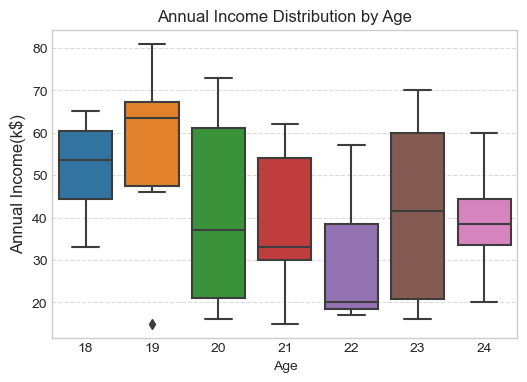

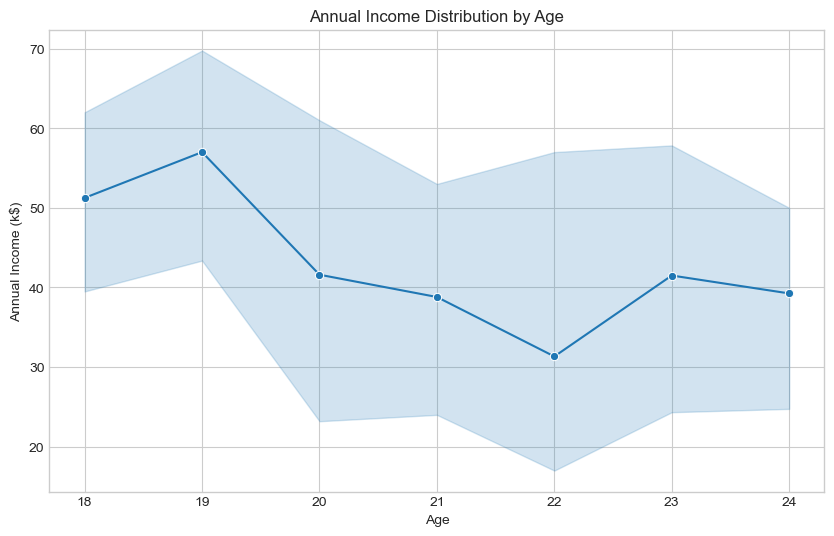

In [31]:
# Checking correlation between Age and Annual Income
plt.figure(figsize=(6,4))
sns.boxplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('age_income_bp.png')  
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Age", y='Annual Income (k$)', marker='o')
plt.title('Annual Income Distribution by Age')
plt.savefig('age_income_ln.png')
plt.show()


In [32]:
# Calculate summary statistics by Age 
age_stats = df.groupby('Age')['Annual Income (k$)'].describe()
print("Annual Income Statistics by Gender")
print(age_stats)

Annual Income Statistics by Gender
     count       mean        std   min    25%   50%    75%   max
Age                                                             
18     4.0  51.250000  14.056434  33.0  44.25  53.5  60.50  65.0
19     8.0  57.000000  20.632845  15.0  47.50  63.5  67.25  81.0
20     5.0  41.600000  24.815318  16.0  21.00  37.0  61.00  73.0
21     5.0  38.800000  19.018412  15.0  30.00  33.0  54.00  62.0
22     3.0  31.333333  22.278540  17.0  18.50  20.0  38.50  57.0
23     6.0  41.500000  23.441416  16.0  20.75  41.5  60.00  70.0
24     4.0  39.250000  16.357975  20.0  33.50  38.5  44.25  60.0


In [33]:
# Count of customers in each Age category 
age_counts = df['Age'].value_counts()
print("\nCustomer Count by Age")
print(age_counts)


Customer Count by Age
Age
19    8
23    6
21    5
20    5
24    4
18    4
22    3
Name: count, dtype: int64


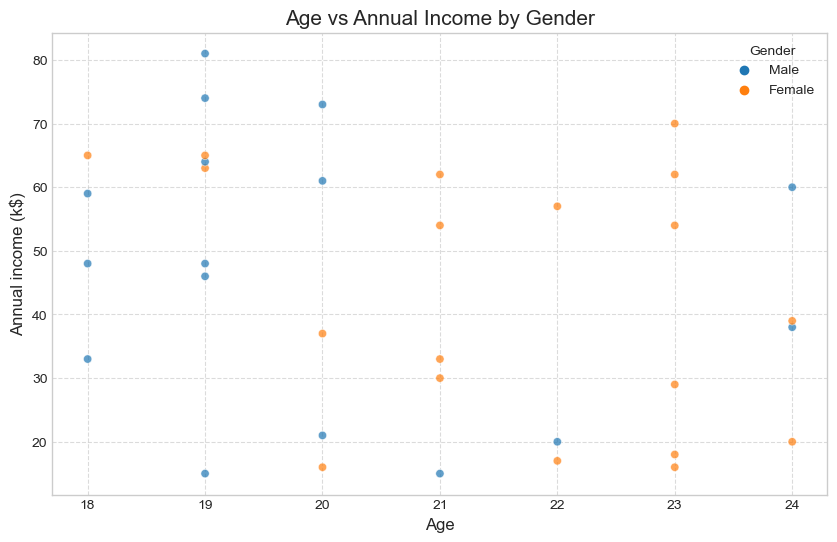

In [36]:
# Explore the correlation between age vs annual income, colored by Gender
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, alpha=0.7)
plt.title('Age vs Annual Income by Gender', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Annual income (k$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Gender')
plt.show()

# # Group statistics
# group_stats = df.groupby(['Gender', 'Age Group'])['Annual Income (k$)'].agg(['mean', 'median', 'count'])
# print("Annual Income Statistics by Gender and Age Group:")
# print(group_stats)

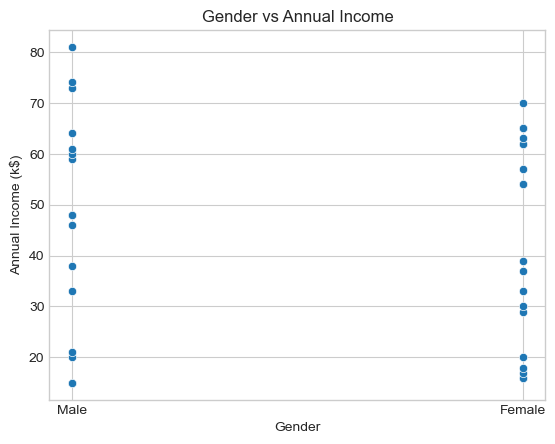

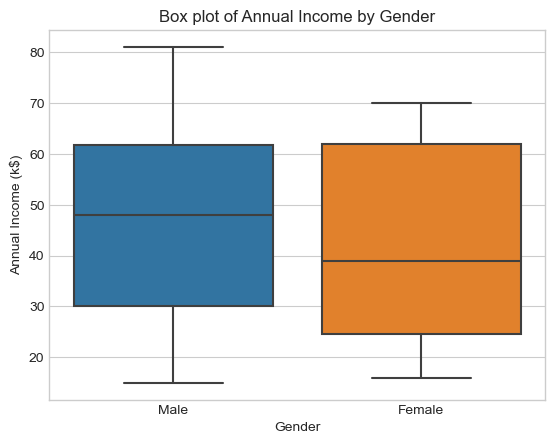

In [39]:
#Investigating the outlier in female vs annual income data
# Scatter plot 
sns.scatterplot(data=df, x='Gender', y='Annual Income (k$)')
plt.title('Gender vs Annual Income')
plt.show()

# Optional : Box plot for more clarity 
sns.boxplot(data=df, x='Gender', y='Annual Income (k$)')
plt.title('Box plot of Annual Income by Gender')
plt.show()

In [45]:
# Filter female customers 
female_df = df[df['Gender']== 'Female']

# Calculate IQR
Q1 = female_df['Annual Income (k$)'].quantile(0.25)
Q3 = female_df['Annual Income (k$)'].quantile(0.75)
IQR = Q3-Q1

# Define Bounds 
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find Outliers 
outliers = female_df[(female_df['Annual Income (k$)'] < lower_bound) | 
                    (female_df['Annual Income (k$)']> upper_bound)]

print("Outliers in Female Annual Income:\n", outliers)



Outliers in Female Annual Income:
 Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100), Z-Score AI, AI Outlier(Y/N), Z-Score SS, SS Outlier(Y/N)]
Index: []


In [51]:
df['AI Outlier (Z > 2.5)?'] = df['Z-Score AI'].apply(lambda x: 'Y' if abs(x) > 2.5 else 'N')
print(df[['CustomerID', 'Gender', 'Annual Income (k$)', 'Z-Score AI', 'AI Outlier (Z > 2.5)?']].head())

# Check if there are any outliers
outliers_count = df[df['AI Outlier (Z > 2.5)?'] == 'Y'].shape[0]
# Print the result
print(f"Number of outliers detected: {outliers_count}")


   CustomerID  Gender  Annual Income (k$)  Z-Score AI AI Outlier (Z > 2.5)?
0           1    Male                  15   -0.279426                     N
1           2    Male                  15    1.795103                     N
2           3  Female                  16   -1.909414                     N
3           4  Female                  16    1.597529                     N
4           6  Female                  17    1.548135                     N
Number of outliers detected: 0
